In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [248]:
pd.options.display.max_columns = 999
pd.set_option('display.precision', 2)
plt.style.use('ggplot')

In [194]:
df = pd.read_csv("../src/data.csv", index_col=0)

In [195]:
df.columns = ['ID', 'room_count', 'type', 'metro', 'address',
       'apartment_sqm', 'house_type', 'parking', 'price', 'tel', 'description',
       'furnish', 'rooms_sqm', 'balcony', 'windows', 'toilets',
       'kids_pets', 'extra', 'house_name',
       'house_series', 'ceiling_height', 'elevator', 'waste_chute',
       'link']

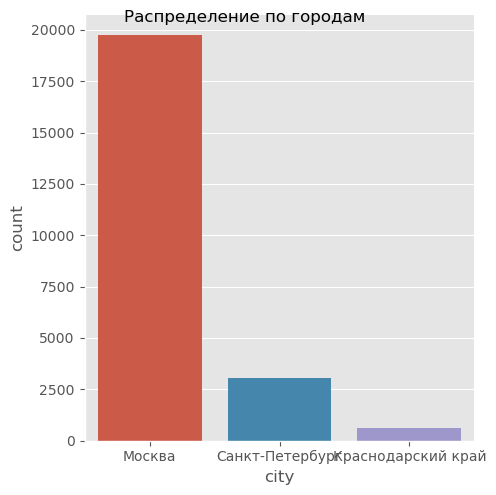

In [196]:
moscow = df[df['address'].str.startswith('Москва', na=False)].reset_index()
spb = df[df['address'].str.startswith('Санкт-Петербург', na=False)].reset_index()
krasnodar = df[df['address'].str.startswith('Краснодарский край', na=False)].reset_index()


count = pd.DataFrame({
    'city': ['Москва', 'Санкт-Петербург', 'Краснодарский край'],
    'count': [moscow.index.max(), spb.index.max(), krasnodar.index.max()]
})
g = sns.catplot(data=count, x='city', y='count', kind='bar', hue='city')
g.fig.suptitle('Распределение по городам');

### Убираем все кроме мск

In [197]:
df = df[df['address'].str.startswith('Москва', na=False)].reset_index()

мб удалить

In [198]:
x,y = df.shape
print(f'В наборе данных {x} строк и {y} столбцов')

В наборе данных 19737 строк и 25 столбцов


Попробовать вывести все строки

In [246]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19737 entries, 0 to 19736
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            19737 non-null  int64  
 1   ID               19737 non-null  int64  
 2   room_count       19202 non-null  float64
 3   type             19737 non-null  object 
 4   metro            19391 non-null  object 
 5   address          19737 non-null  object 
 6   apartment_sqm    19737 non-null  float64
 7   house_type       16766 non-null  object 
 8   parking          8563 non-null   object 
 9   price            19737 non-null  object 
 10  tel              19737 non-null  object 
 11  description      19737 non-null  object 
 12  furnish          17274 non-null  object 
 13  rooms_sqm        12509 non-null  object 
 14  balcony          13107 non-null  object 
 15  windows          14587 non-null  object 
 16  toilets          17696 non-null  object 
 17  kids_pets   

In [201]:
x = df['ID'].duplicated().sum()
y = df['link'].duplicated().sum()

print(f'В наборе данных {x} дубликатов ID помещения и {y} дубликатов страницы на Циан')

В наборе данных 0 дубликатов ID помещения и 0 дубликатов страницы на Циан


In [202]:
def convert_price(n):
    x = n.split()
    if '$' in x[1]:
        return float(x[0])*90
    if '€' in n.split()[1]:
        return float(x[0])*100
    else:
        return float(x[0])

df['price_cleaned'] = df['price'].map(convert_price)

In [203]:
def get_total_floors(x):
    if isinstance(x, str):
        return int(x.split('/')[1].split(',')[0])
    return x

def get_floor(x):
    if isinstance(x, str):
        return int(x.split('/')[0])
    return x

def get_house_type(x):
    if isinstance(x, str):
        try:
            return x.split('/')[1].split(', ')[1]
        except:
            return np.nan
    return x

df['floor'] = df['house_type'].map(get_floor)
df['total_floors'] = df['house_type'].map(get_total_floors)
df['house_type'] = df['house_type'].map(get_house_type)

In [204]:
df.apartment_sqm = df.apartment_sqm.map(lambda x: float(x.split('/')[0]))

In [205]:
def get_mins_from_metro(x):
    try:
        mins = x.split('(')[1].split(' ')[0]
        return int(mins)
    except:
        return np.nan

def fix_metro(x):
    if isinstance(x, str):
        return x.split(' (')[0]
    return x

df['mins_from_metro'] = df['metro'].map(get_mins_from_metro)
df['metro'] = df['metro'].map(fix_metro)

In [206]:
def fix_rooms(x):
    if isinstance(x, str):
        return x.split(',')[0]
    return x

df.room_count = df.room_count.map(fix_rooms)
df['room_count'] = df['room_count'].astype(float)

In [207]:
import re

def count_toilets(x):
    if isinstance(x, str):
        numbers = re.findall(r'\d+', x)
        return sum(map(int, numbers)) if numbers else np.nan
    return np.nan


df['toilet_count'] = df['toilets'].map(count_toilets)

1. Присвоить title
2. Попробовать вывести как % от всего

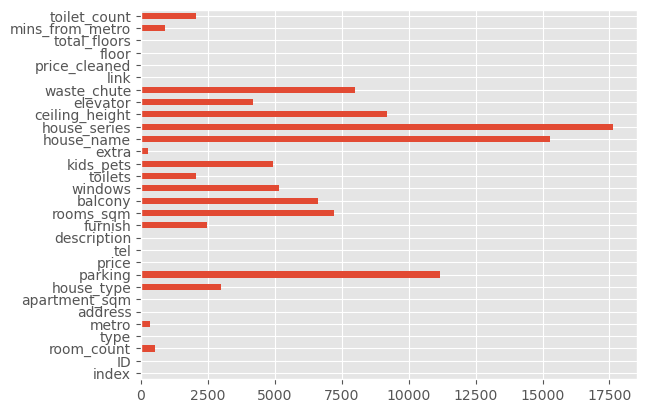

In [208]:
df.isna().sum().plot(kind='barh');

In [249]:
df.describe()

,index,ID,room_count,apartment_sqm,ceiling_height,price_cleaned,floor,total_floors,mins_from_metro,toilet_count
count,19737.00,1.97e+04,19202.00,19737.00,10535.00,1.97e+04,19737.00,19737.00,18853.00,17696.00
mean,11155.83,2.67e+08,2.03,63.56,2.99,8.78e+04,7.52,14.49,9.65,1.22
std,6559.87,1.98e+07,1.01,47.94,7.85,1.34e+05,6.00,9.06,6.14,0.54
min,0.00,1.07e+08,1.00,7.00,1.20,1.20e+04,-1.00,1.00,0.00,1.00
25%,5534.00,2.71e+08,1.00,38.90,2.64,4.00e+04,3.00,9.00,5.00,1.00
50%,10981.00,2.74e+08,2.00,49.80,2.64,5.00e+04,6.00,12.00,9.00,1.00
75%,16731.00,2.75e+08,3.00,70.00,2.80,7.50e+04,10.00,17.00,13.00,1.00
max,23367.00,2.75e+08,6.00,811.00,320.00,3.00e+06,85.00,116.00,119.00,6.00


In [ ]:
only_nums = df[['room_count', 'apartment_sqm', 'ceiling_height', 'price_cleaned', 'mins_from_metro', 'toilet_count', 'total_floors', 'floor']]
lim_cats = df[['furnish', 'windows', 'waste_chute', 'kids_pets', 'house_type', 'parking']]

### Убрать подписи под графиками

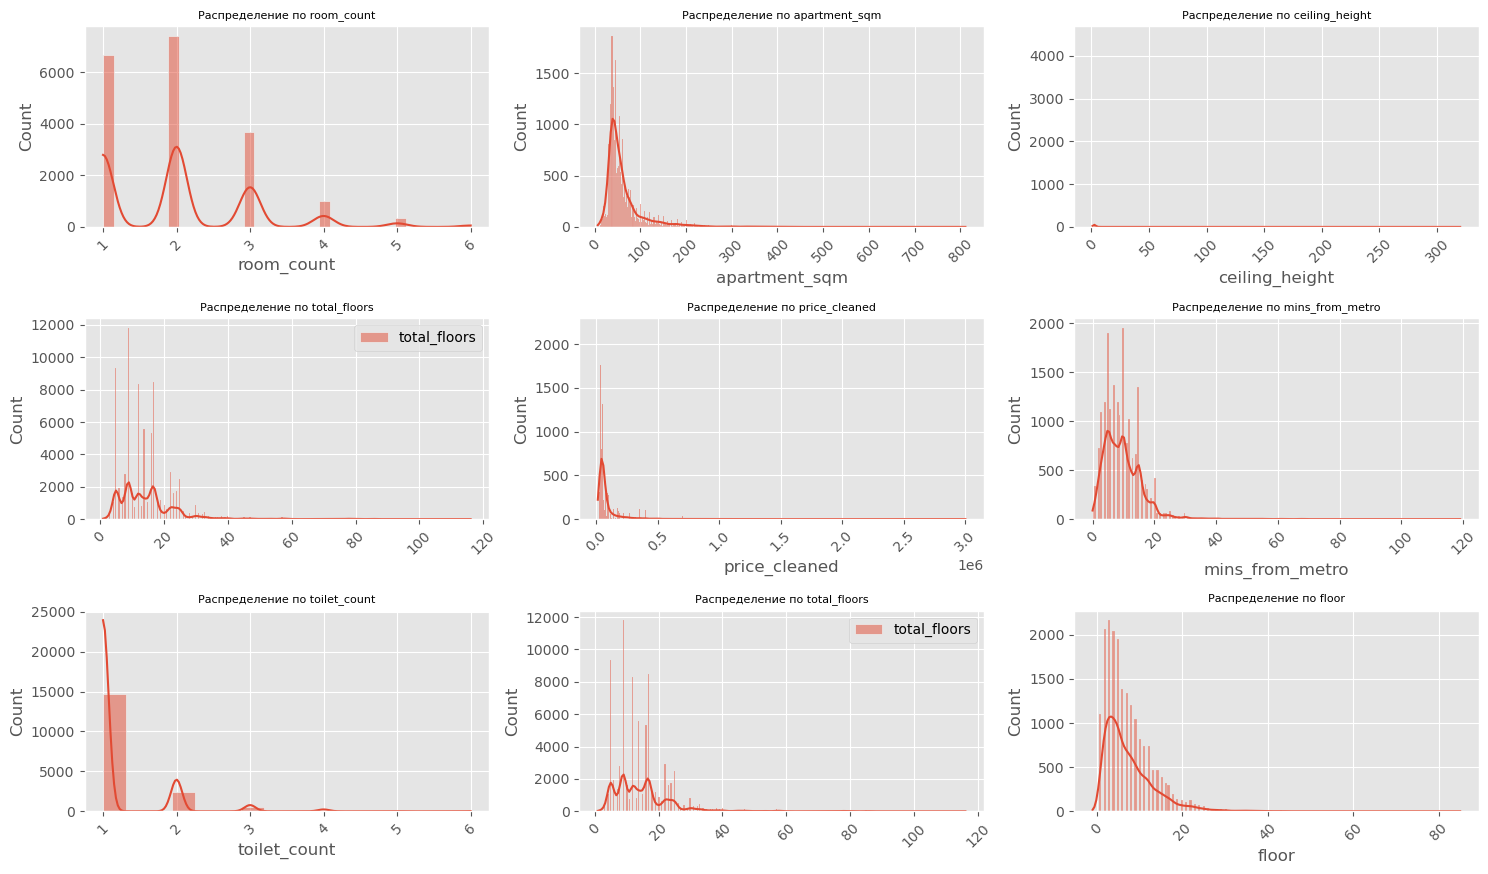

In [221]:
plt.figure(figsize=(15, 20))

for i, column in enumerate(only_nums.columns):
    plt.subplot(7, 3, i+1)
    sns.histplot(only_nums[column], kde=True)
    plt.title(f'Распределение по {column}', fontsize=8)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

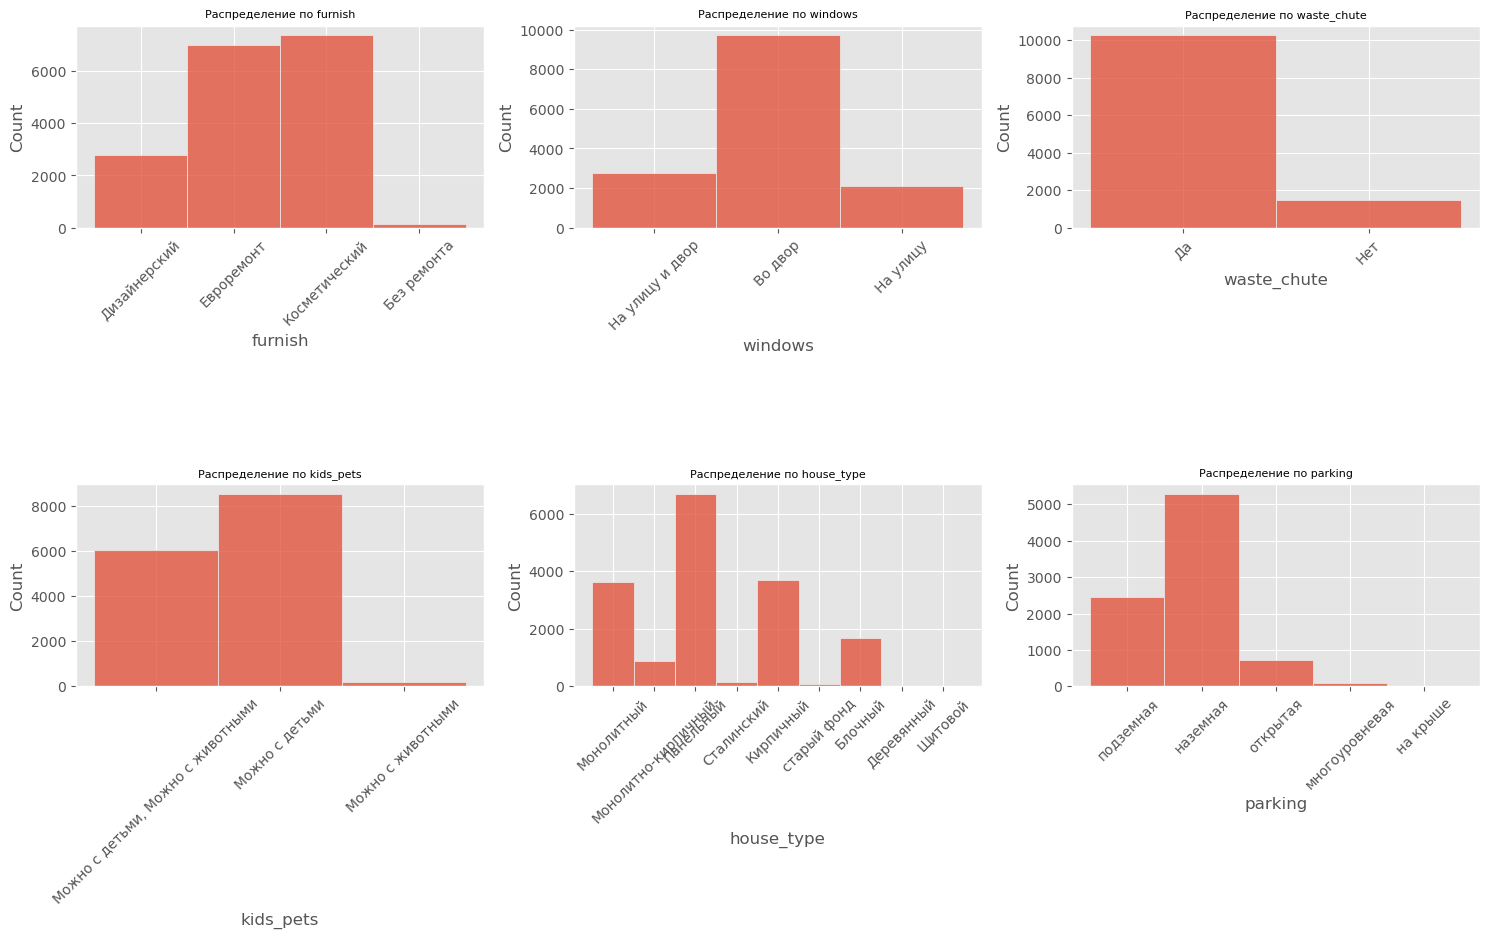

In [251]:
plt.figure(figsize=(15, 30))

for i, column in enumerate(lim_cats.columns):
    plt.subplot(7, 3, i+1)
    sns.histplot(lim_cats[column])
    plt.title(f'Распределение по {column}', fontsize=8)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

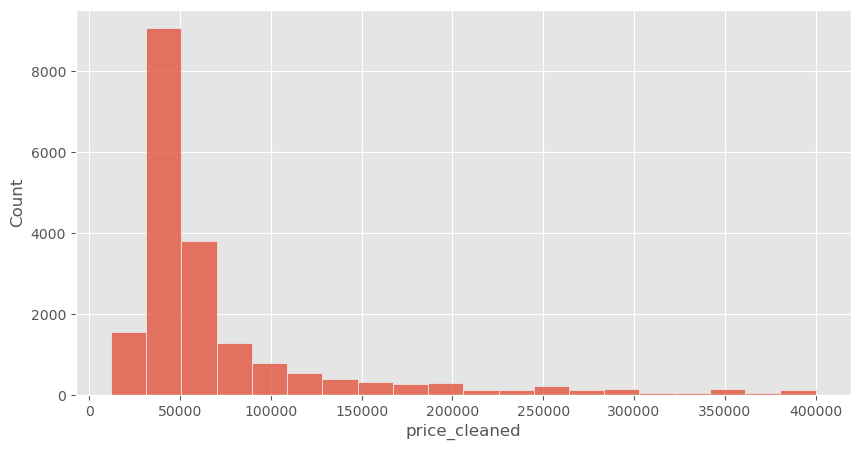

In [216]:
plt.figure(figsize=(10,5))

price_400 = df[df.price_cleaned <= 400000]
sns.histplot(data=price_400, x='price_cleaned', bins=20);

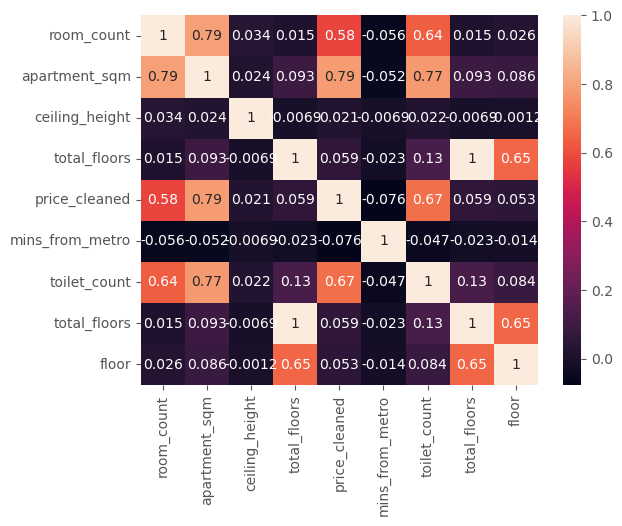

In [224]:
sns.heatmap(only_nums.corr(), annot=True);

### Поменять xlabel на туалеты и комнаты ниже

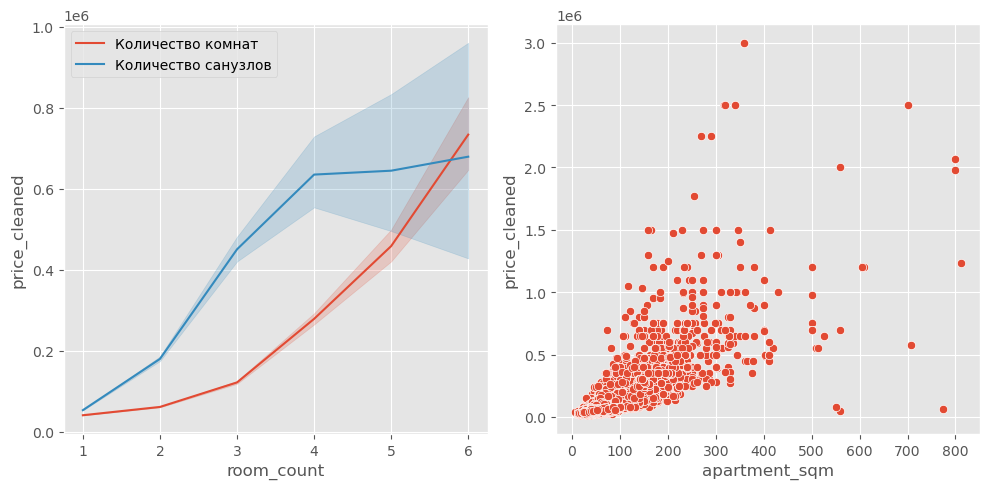

In [255]:
fig, ax = plt.subplots(1,2, figsize=(10, 5))

sns.lineplot(data=df, y='price_cleaned', x='room_count', ax=ax[0], label='Количество комнат')
sns.lineplot(data=df, y='price_cleaned', x='toilet_count', ax=ax[0], label='Количество санузлов')
sns.scatterplot(data=df, y='price_cleaned', x='apartment_sqm', ax=ax[1])

ax[0].legend()
plt.tight_layout()
plt.show()